# <center> CS 178: Machine Learning &amp; Data Mining </center>
## <center> Homework 4: Due Tuesday 22 November 2022 (11:59pm) </center>
### <center> Version 1.0 (Last Modified: 10 November 2022) </center>

---
## Instructions


This homework (and many subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it.


Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You are encouraged to use these starter Jupyter notebooks to complete your assignment and to write your report. This will help you not only ensure that all of the code for the solutions is included, but also will provide an easy way to export your results to a PDF file (for example, doing *print preview* and *printing to pdf*). I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

If you have any questions/concerns about using Jupyter notebooks, ask us on EdD. If you decide not to use Jupyter notebooks, but go with Microsoft Word or Latex to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.

### Summary of Assignment: 100 total points
- Problem 1: Drawing a Decision Tree (15 points)
- Problem 2: Computing the Gini Index (15 points)
- Problem 3: Implementing Decision Trees (50 points)
    - Problem 3.1: `class_prob_vector` (5 points)
    - Problem 3.2: `leaf_condition` (10 points)
    - Problem 3.3: `gini_score` (10 points)
    - Problem 3.4: `find_best_split` (15 points)
    - Problem 3.5: `build_tree` (10 points)
- Problem 4: Experimenting with Sklearn (15 points)
    - Problem 4.1: Training a small DT (5 points)
    - Problem 4.2: Varying depth (5 points)
    - Problem 4.3: Varying min_leaf (5 points)
- Statement of Collaboration (5 points)

Before we get started, let's import some libraries that you will make use of in this assignment. Make sure that you run the code cell below in order to import these libraries.

**Important: In the code block below, we set `seed=1234`. This is to ensure your code has reproducible results and is important for grading. Do not change this. If you are not using the provided Jupyter notebook, make sure to also set the random seed as below.**

**Important: Do not change any codes we give you below, except for those waiting for you to complete. This is to ensure your code has reproducible results and is important for grading.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, load_breast_cancer, load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  

---
## Problem 1 (15 points): Draw a Decision Tree

In the image below, you are given some data for a binary classification problem with features $X_1$ and $X_2$ and labels $y = 0$ or $y = 1$. In addition, the dashed black lines depict the splits of a particular decision tree trained on this data.

- Draw the decision tree corresponding to the splits in the image. For every leaf node, you should also include $p(y = 1 | \text{path})$. 
- Write your answer on paper and include a picture of your answer in this notebook. In order to include an image in Jupyter notebook, save the image in the same directory as the .ipynb file and then write `![caption](image.png)`. Alternatively, you may go to Edit --> Insert Image at the top menu to insert an image into a Markdown cell. Double check that your image is visible in your PDF submission.

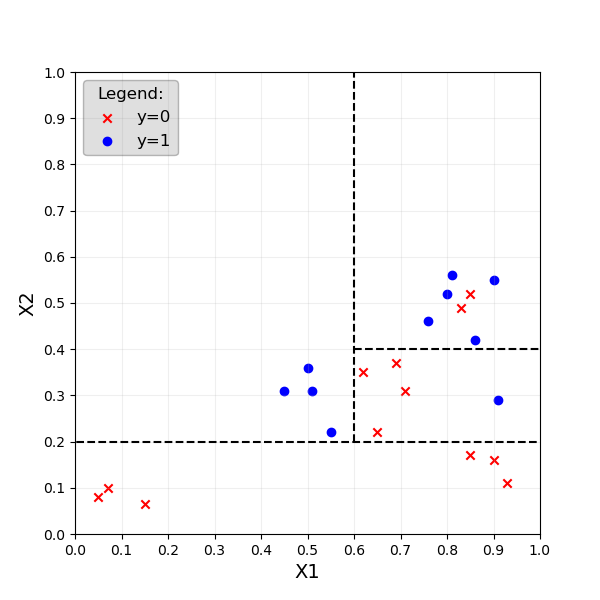


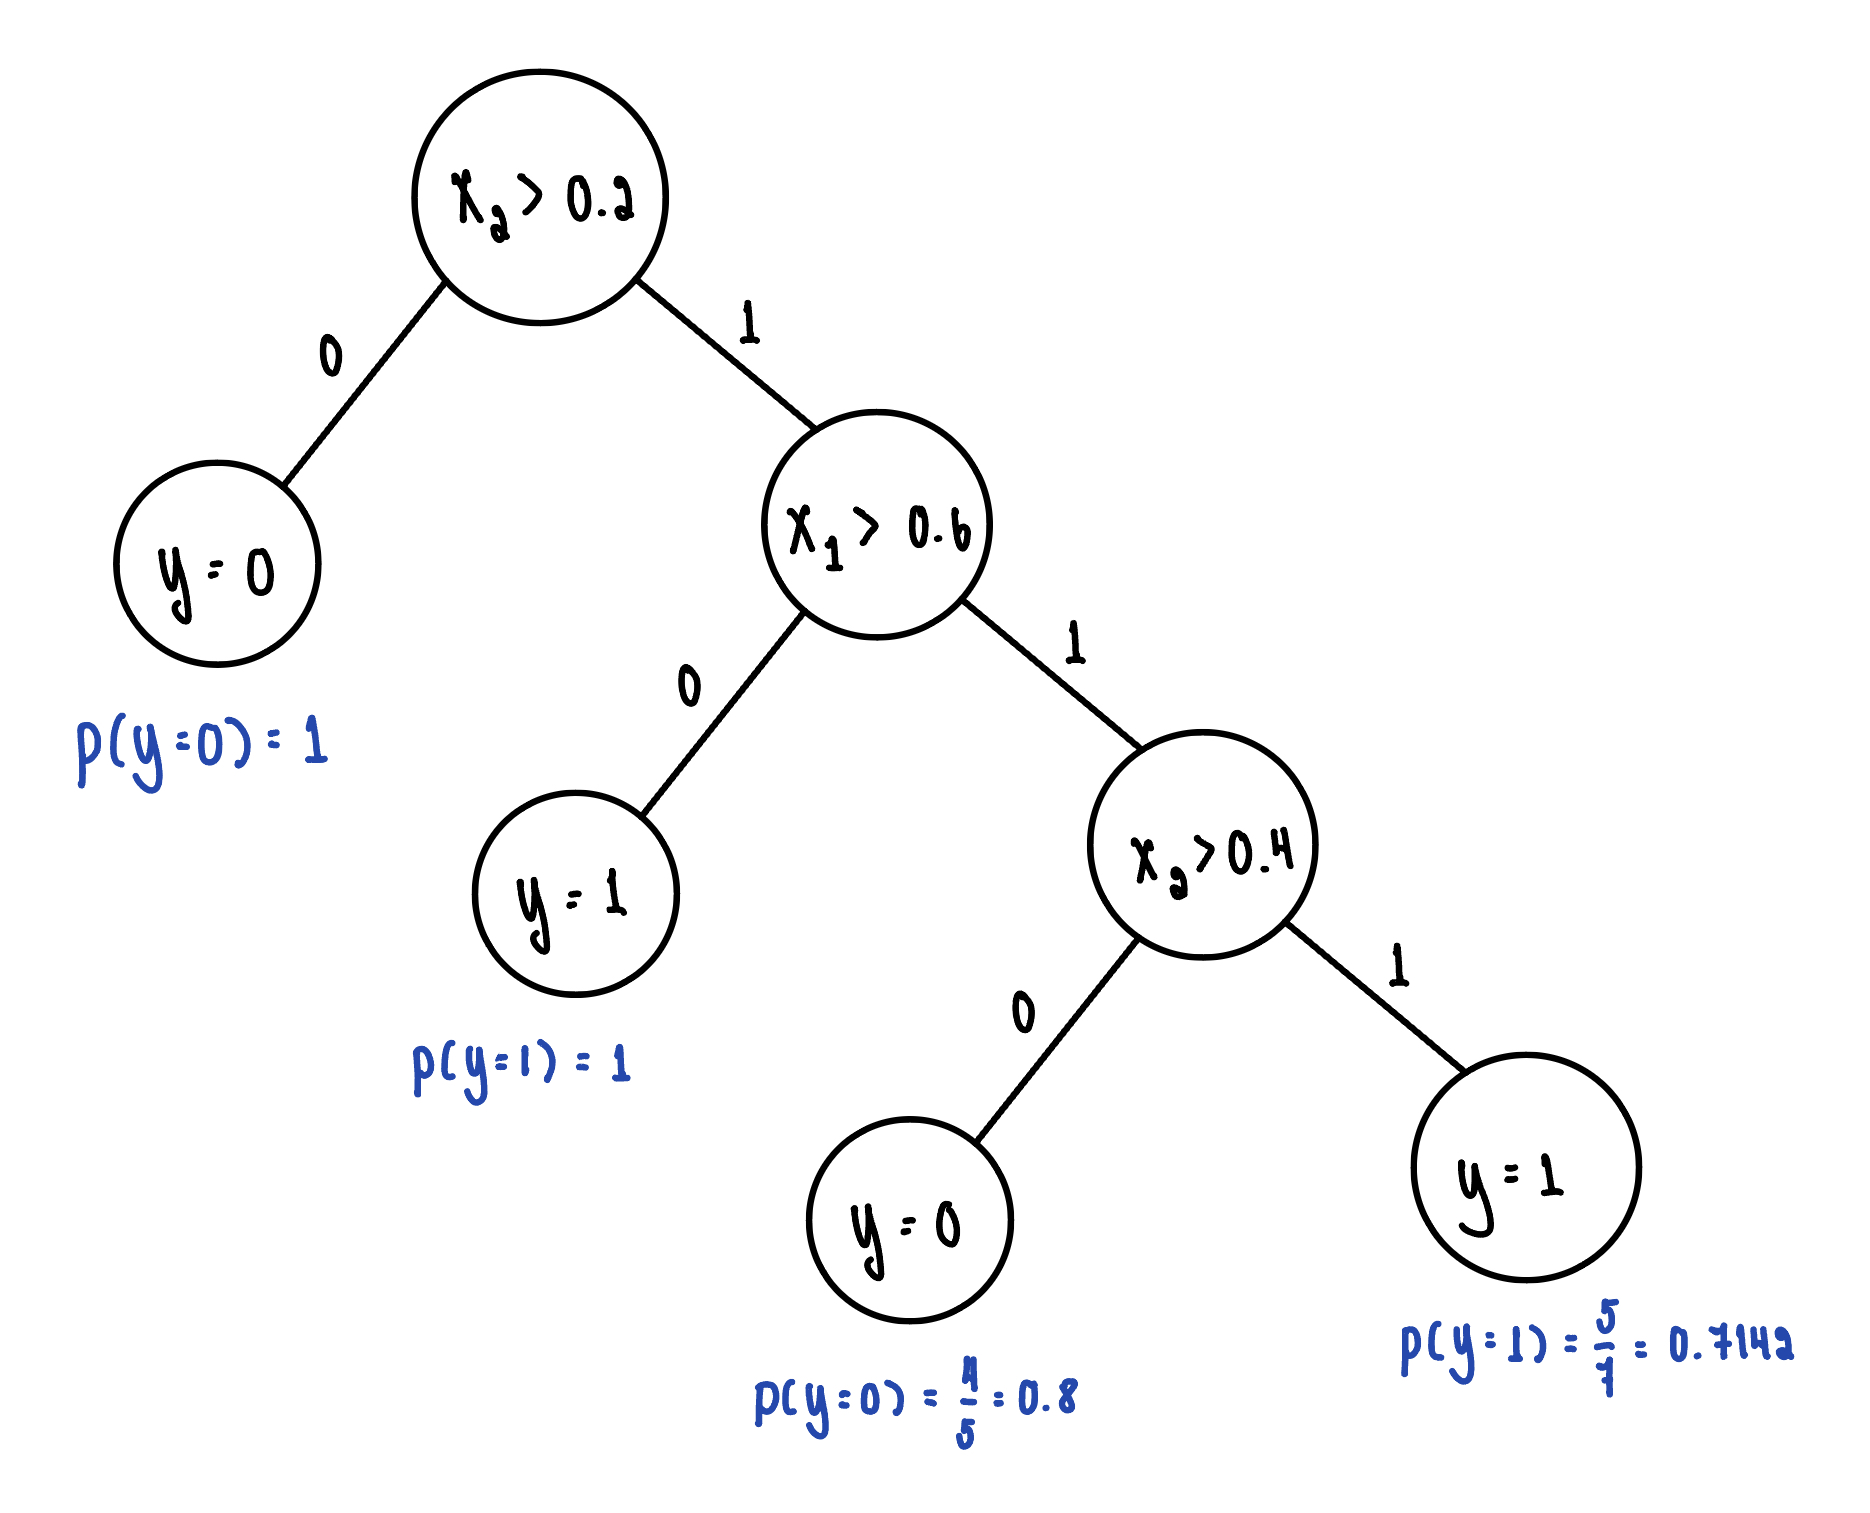

---
## Problem 2 (15 points): Computing the Gini Index

In the table below, you are given some data for a classification problem with 3 features and 3 classes. The feature $X_1$ is a binary feature, and the features $X_2$ and $X_3$ are real-valued features. The three classes are labeled $y = 0, 1, 2$. 

In this problem, you will use the Gini index to decide which feature to split on. In other words, you will be creating the root of a decision tree based on this data. You should do this problem by hand, and include an image (or LaTeX) with your solution in your notebook. See Problem 1 for details on how to include an image in your notebook.

- What is the Gini index of the data before doing any splitting?
- For each feature, compute the Gini index of splitting on that feature. Use a threshold of $t = 0.4$ for $X_2$ and $t = 2.0$ for $X_3$. (Why don't we need to specify a threshold for $X_1$? You don't have to answer this, but you should think about it.) 
- Based on your answer to the previous question, which feature should we split on for the root of our decision tree?


| X1 | X2   | X3   | y |
|----|------|------|---|
| 0  | 0.1  | 3.4  | 0 |
| 1  | 0.3  | 3.0  | 0 |
| 0  | -0.2 | 2.9  | 0 |
| 0  | 1.3  | 0.1  | 1 |
| 1  | 2.2  | -0.5 | 1 |
| 0  | 4.0  | 0.3  | 1 |
| 1  | 0.5  | 1.2  | 2 |
| 1  | 3.0  | 0.75 | 2 |
| 1  | 2.2  | 0.1  | 2 |
| 0  | 0.25 | 0.1  | 2 |

Answer: **Gini index of the data before splitting is 0.66**

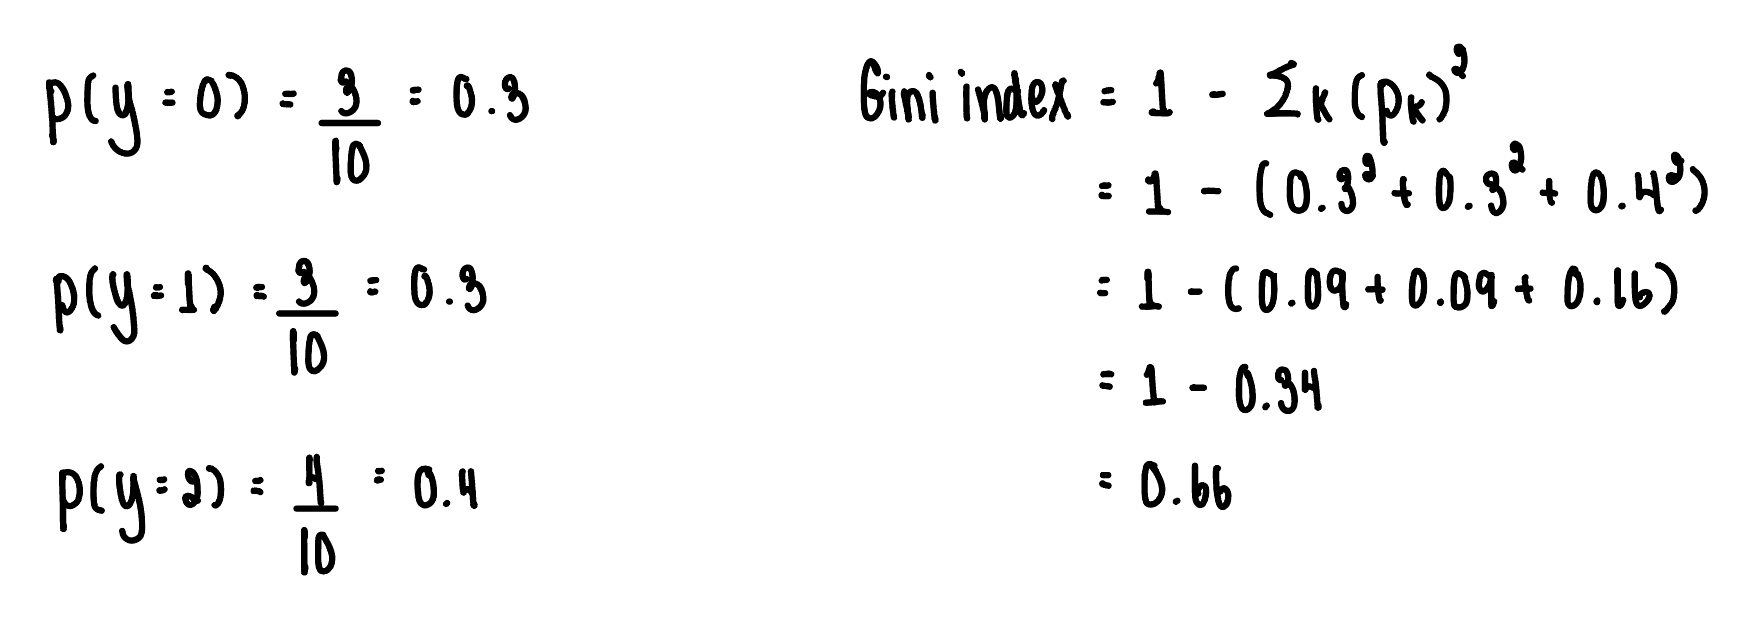

Answer: **Gini index of splitting on feature $X_2$ at $t = 0.4$ and $X_3$ at $t = 2.0$**

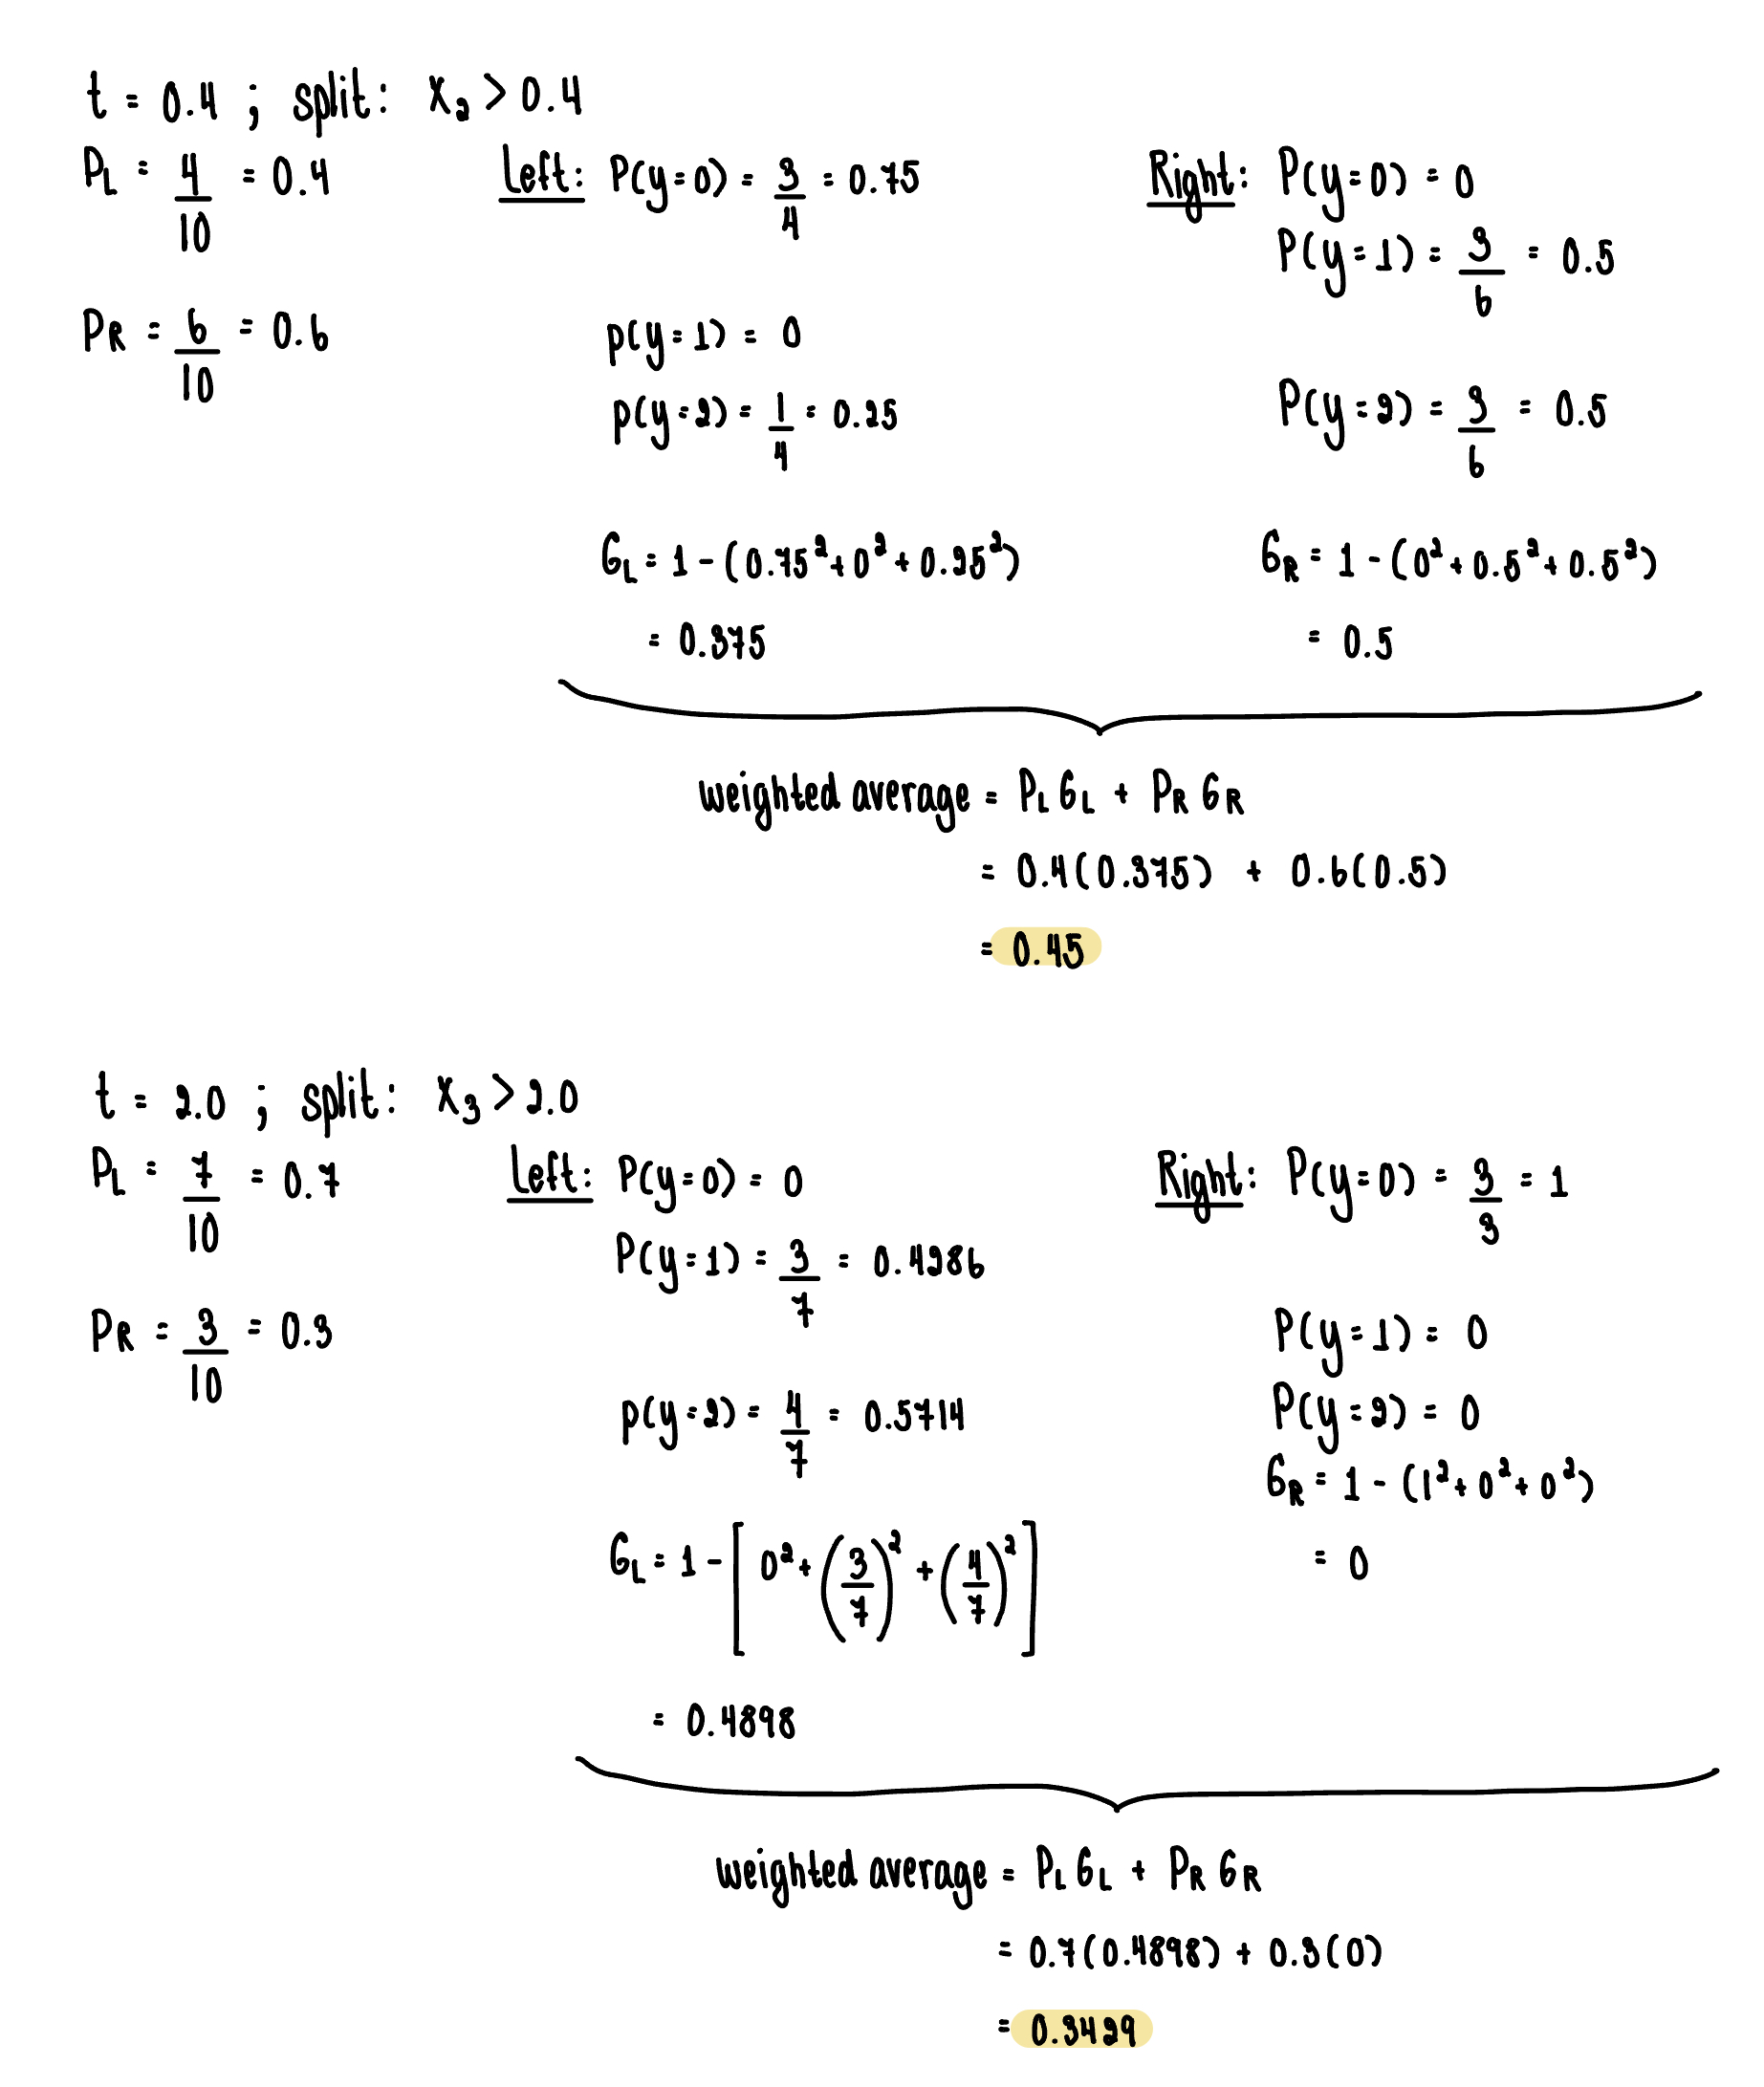

Answer: **Based on the gini index, we should split on $X_3$ since it has lower uncertainty that splitting on $X_2$.**

---
## Problem 3: Implementing a Decision Tree

You will now implement an algorithm for learning a decision tree from data. You are given some starter code below that you will need to complete. To keep things simple, your implementation will only work for binary classification.

The class `Node` represents a single node in a decision tree. This class is already completed for you, and contains several useful attributes. In addition, the class `DecisionTree` is partially implemented for you. Before attempting this problem, it is important that you read and understand both of these classes.

In [2]:
class Node:
    """ A class representing a node in a decision tree.
    """
    
    def __init__(self, depth):
        self.depth = depth         # What level of the tree this node is at; depth=0 is the root node
        
        self.split_feature = None  # The index of the feature that this node splits, if any
        self.threshold = None      # The threshold used to split the feature
        
        self.left_child = None     # A node object (or None) representing the left-hand child of this node 
        self.right_child = None    # A node object (or None) representing the right-hand child of this node
        
        self.probs = None          # A numpy array of length 2 representing [p(y=0), p(y=1)] at this node
        
    def __repr__(self):
        # Gives a nice looking representation if you call print on a node 
        
        return f'DT Node: \n -| Depth: {self.depth}' \
                        f'\n -| Split feature: {self.split_feature}' \
                        f'\n -| Threshold: {self.threshold}' \
                        f'\n -| Probs: {self.probs}'

In [43]:
class DecisionTree:
    """ A class representing a decision tree.
    """
    
    def __init__(self, max_depth=3):
        self.root = None            # A Node object which is the root of our tree
        self.max_depth = max_depth  # An integer representing the maximum allowed depth of the tree
        
    def class_prob_vector(self, y):
        """ Given an array of labels y, compute p(y=0) and p(y=1).
        
        returns: a numpy array containing [p(y=0), p(y=1)].
        """
        ### YOUR CODE STARTS HERE ###
        
        y_len = len(y)
        class1_count = np.count_nonzero(y)
        class0_prob = (y_len - class1_count) / y_len
        class1_prob = class1_count / y_len
        
        return np.array([class0_prob, class1_prob])
        
        ### YOUR CODE ENDS HERE ###
        
    def leaf_condition(self, node):
        """ Given a Node object, returns True if this is a leaf node and False otherwise.
        
        A Node is considered a leaf node if all labels at the node belong to the same class,
            or if the node is at the maximum allowed depth of the tree.
        """
        ### YOUR CODE STARTS HERE ###
        
        if node.depth == self.max_depth:
            return True
        if 1 in node.probs:
            return True
        
        return False
        
        ### YOUR CODE ENDS HERE ###
        
    def gini_score(self, X, y, i, threshold):
        """ Given features X and labels y, computes the Gini index of splitting
            the i-th feature at the given threshold.
        """
        ### YOUR CODE STARTS HERE ###
        
        dataset_size = len(y)
        # print("datast_size =", dataset_size)
        
        # Datapoint at left of node
        L_count = np.count_nonzero(X < threshold, axis=0)[i]
        prob_L = L_count / dataset_size
        L_class0_count = 0
        L_class1_count = 0
        
        # print(L_count, " datapoints has feature", i, " less than", threshold)
        # print("Probability of going left =", prob_L)
        
        # Datapoint at right of node
        R_count = dataset_size - L_count
        prob_R = R_count / dataset_size
        R_class0_count = 0
        R_class1_count = 0
        
        # print(R_count, " datapoints has feature", i, " more than", threshold)
        # print("Probability of going right =", prob_R)
        
                
        for index in range(dataset_size):
            if X[index][i] < threshold:
                if y[index] == 0:
                    L_class0_count += 1
                else:
                    L_class1_count += 1
            else:
                if y[index] == 0:
                    R_class0_count += 1
                else:
                    R_class1_count += 1
        
        if L_count == 0:
            prob_L_class0 = 0
            prob_L_class1 = 0
        else:
            prob_L_class0 = L_class0_count / L_count
            prob_L_class1 = L_class1_count / L_count
            
        if R_count == 0:
            prob_R_class0 = 0
            prob_R_class1 = 0
        else:
            prob_R_class0 = R_class0_count / R_count
            prob_R_class1 = R_class1_count / R_count
        
        L_GiniIndex = 1 - ((prob_L_class0 ** 2) + (prob_L_class1 ** 2))
        R_GiniIndex = 1 - ((prob_R_class0 ** 2) + (prob_R_class1 ** 2))
        
        return (prob_L * L_GiniIndex) + (prob_R * R_GiniIndex)
        
        ### YOUR CODE ENDS HERE ###
        
    def find_best_split(self, X, y):
        """ Given features X and labels y, finds the best split based on the Gini index.
        
        returns: an index corresponding to which feature we are splitting,
            as well as the threshold we are splitting the feature at.
        """
            
        ### YOUR CODE STARTS HERE ###
        
        min_gini = np.inf
        min_threshold = -1
        feature_index = -1
        
        # Go over all features one by one
        for i in range(X.shape[1]):
            threshold_values = []
            feature_values = np.sort(np.unique(X[:, i]))
            
            for j in range(len(feature_values) - 1):
                threshold_values.append((feature_values[j + 1] + 
                                         feature_values[j]) / 2)
                
            for threshold in threshold_values:
                current_gini = self.gini_score(X, y, i, threshold)
                if current_gini < min_gini:
                    min_gini = current_gini
                    min_threshold = threshold
                    feature_index = i
                    
        return feature_index, min_threshold
        
        ### YOUR CODE ENDS HERE ###
        
    def fit(self, X, y):
        """ Fits the decision tree given features X and labels y.
        """
        assert isinstance(X, np.ndarray), 'X must be a numpy array'
        assert isinstance(y, np.ndarray), 'y must be a numpy array'
        
        self.build_tree(X, y, 0)
    
    def build_tree(self, X, y, depth):
        """ Recursively builds the decision tree.
        """
                
        # Create a new node
        node = Node(depth)
        if depth == 0:
            self.root = node
            
        # Get the class probabilities for this node
        node.probs = self.class_prob_vector(y)
                
        # Check if this new node is a leaf node; otherwise, split it
        if self.leaf_condition(node):
            return node            
        else:            
            # Find which feature to split on and the splitting threshold
            split_idx, split_threshold = self.find_best_split(X, y)
            
            # Create left/right splits of data based on split_idx, split_threshold
            L_features = []
            L_labels = []
            R_features = []
            R_labels = []
            
            for data_index in range(len(y)):
                if X[data_index][split_idx] < split_threshold:
                    L_features.append(X[data_index])
                    L_labels.append(y[data_index])
                else:
                    R_features.append(X[data_index])
                    R_labels.append(y[data_index])
                    
            X_L, y_L = np.array(L_features), np.array(L_labels)
            X_R, y_R = np.array(R_features), np.array(R_labels)
            
            # Recursively create the left/right nodes
            node_L = self.build_tree(X_L, y_L, depth + 1)
            node_R = self.build_tree(X_R, y_R, depth + 1)
            
            # Fill in node information
            node.split_feature = split_idx
            node.threshold = split_threshold
            node.left_child = node_L
            node.right_child = node_R
            
            return node
        
    def predict(self, X):
        """ After fitting the decision tree, this function can be called to make predictions
            for every data point in the feature array X. 
        """
        y_hat = []
        
        for x in X:
            # Make a prediction for every row in X
            y_hat.append(self._predict(x))
        
        y_hat = np.array(y_hat)
        return y_hat
                        
    def _predict(self, x):
        """ Makes predictions on individual datapoints x.
        """
        current_node = self.root
        
        while True:
            if self.leaf_condition(current_node):
                # If we're at a leaf node, make a prediction based on the probabilities
                probs = current_node.probs
                y_hat = np.argmax(probs)
                return y_hat
            else:
                # Otherwise, traverse the tree based on the splits
                go_left = x[current_node.split_feature] <= current_node.threshold
                if go_left:
                    current_node = current_node.left_child
                else:
                    current_node = current_node.right_child
                
    
    def __repr__(self):
        # Pretty printing if we call print on our DecisionTree
        return f'Decision Tree \n -| Max Depth: {self.max_depth}'

### Problem 3.1 (5 points):

- Complete the function `class_prob_vector`. This function takes in array of labels `y` and returns a numpy array containing $p(y=0)$ and $p(y=1)$.
- Run the code block given below to test your implementation. If your code is correct, all tests should pass.

In [5]:
# Use this code block to test your implementation in Problem 3.1
# Don't change anything here -- just run it

dt = DecisionTree(max_depth=3)

y = np.array([0, 0, 1, 1, 1])
expected = np.array([0.4, 0.6])
out = dt.class_prob_vector(y)

print(f'Test 1 passed: {np.array_equal(expected, out)}')

y = np.array([1, 1, 1])
expected = np.array([0., 1.])
out = dt.class_prob_vector(y)

print(f'Test 2 passed: {np.array_equal(expected, out)}')

Test 1 passed: True
Test 2 passed: True


### Problem 3.2 (10 points):

In our decision tree implementation, we will consider a node to be a leaf node if either (a) all labels at the node belong to the same class, or (b) the node is at depth `max_depth`, where `max_depth` is an attribute of our `DecisionTree` that we can specify.

- Complete the function `leaf_condition`. This function should take in a `Node` object and return True if this node is a leaf node (according to the above criteria) and False otherwise. You should be able to determine this based on the attributes already defined in the `Node` class.
- Run the code block given below to test your implementation. If your code is correct, all tests should pass.


In [6]:
# Use this code block to test your implementation in Problem 3.2
# Don't change anything here -- just run it

dt = DecisionTree(max_depth=3)

node = Node(depth=2)
node.probs = np.array([0.5, 0.5])
expected = False
out = dt.leaf_condition(node)
print(f'Test 1 passed: {np.array_equal(expected, out)}')

node = Node(depth=3)
node.probs = np.array([0.5, 0.5])
expected = True
out = dt.leaf_condition(node)
print(f'Test 2 passed: {np.array_equal(expected, out)}')

node = Node(depth=1)
node.probs = np.array([1., 0.])
expected = True
out = dt.leaf_condition(node)
print(f'Test 3 passed: {np.array_equal(expected, out)}')

Test 1 passed: True
Test 2 passed: True
Test 3 passed: True


### Problem 3.3 (10 points):

Your next task is to implement a function that computes the Gini index.

- Complete the function `gini_score`. This function takes in features `X` and labels `y`, as well as a feature index `i` and a scalar `threshold`. Given these inputs, the function `gini_score` should return the Gini index (i.e. a single number) obtained by splitting the `i`th feature in `X` at the specified threshold.
- Run the code block given below to test your implementation. If your code is correct, all tests should pass. Note that the numerical tests here are the same as the examples in Lecture 13, which may be helpful in debugging your code.


In [37]:
# Use this code block to test your implementation in Problem 3.3
# Don't change anything here -- just run it

dt = DecisionTree(max_depth=3)

# Note: these are the same values as the example in Lecture 13

X = np.array([[1,1], [2,8], [4,9], [6,7], [7,4], [8,11], [3,3], [5,5], [9,5], [10,8], 
              [11, 6], [12,10]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

expected = 5/11
out = dt.gini_score(X, y, 0, 1.5)
print(f'Test 1 passed: {np.isclose(expected, out)}')

expected = 2/5
out = dt.gini_score(X, y, 0, 2.5)
print(f'Test 2 passed: {np.isclose(expected, out)}')

expected = 5/11
out = dt.gini_score(X, y, 1, 2)
print(f'Test 3 passed: {np.isclose(expected, out)}')

expected = 4/9
out = dt.gini_score(X, y, 1, 6.5)
print(f'Test 4 passed: {np.isclose(expected, out)}')

Test 1 passed: True
Test 2 passed: True
Test 3 passed: True
Test 4 passed: True


### Problem 3.4 (15 points): 

Now, you will use your function `gini_score` to compute the best splits. To do this, you will need to complete the function `find_best_split`. This function takes in features `X` and labels `y`, and returns the feature index and threshold corresponding to the best split as determined by `gini_score`. That is, for every feature and every threshold, you should compute the Gini index of splitting that feature at that threshold, and you should return the index of the feature and the threshold that results in the lowest Gini index.

To determine the thresholds, we will use the **midpoint** strategy. That is, given an array of feature values, we will consider all thresholds given by the midpoints between consecutive feature values. Here's an example. Suppose we are given a feature matrix $X$ with four datapoints and two features, given by
$$X = \begin{bmatrix} 1 & 2 \\ 1.5 & 2.5 \\ 0.75 & -1.0 \\ 3.0 & 0.5 \end{bmatrix}.$$

The thresholds to consider when splitting the second feature would then be $[-0.25, 1.25, 2.25]$.








- Complete the function `find_best_split` as detailed above.
- Run the code block given below to test your implementation. If your code is correct, all tests should pass. Note that the numerical tests here are the same as the examples in Lecture 13, which may be helpful in debugging your code.

In [42]:
# Use this code block to test your implementation in Problem 3.4
# Don't change anything here -- just run it

dt = DecisionTree(max_depth=3)

# Note: these are the same values as the example in Lecture 13

X = np.array([[1,1], [2,8], [4,9], [6,7], [7,4], [8,11], [3,3], [5,5], [9,5], [10,8],
              [11, 6], [12,10]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

expected = (0, 8.5)
out = dt.find_best_split(X, y)
print(f'Test 1 passed: {expected == out}')

X_L, y_L = X[X[:, 0] <= 8.5], y[X[:, 0] <= 8.5]
expected = (1, 6)
out = dt.find_best_split(X_L, y_L)
print(f'Test 2 passed: {expected == out}')

Test 1 passed: True
Test 2 passed: True


### Problem 3.5 (10 points):

For the last step in implementing `DecisionTree`, you will need to complete the function `build_tree`. This function uses the functions you implemented in Problems 3.1-3.4 in order to recursively build your decision tree.

- Complete the function `build_tree`. Fill in the lines of code marked `#TODO`.
- Run the code block given below to test your implementation. If your code is correct, all tests should pass. Note that the *first test* here is the same as the examples in Lecture 13, which may be helpful in debugging your code.


In [44]:
# Use this code block to test your implementation in Problem 3.5
# Don't change anything here -- just run it


# Note: these are the same values as the example in Lecture 13
X = np.array([[1,1], [2,8], [4,9], [6,7], [7,4], [8,11], [3,3], [5,5], [9,5], [10,8], [11, 6], [12,10]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

expected = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1])
dt = DecisionTree(max_depth=3)
dt.fit(X, y)
out = dt.predict(X)
print(f'Test 1 passed: {np.array_equal(expected, out)}')

X, y = make_classification(n_samples = 250, n_features=5, n_informative=3)
sklearn_dt = DecisionTreeClassifier(max_depth=3, criterion='gini')
sklearn_dt.fit(X, y)
expected = sklearn_dt.predict(X)
dt = DecisionTree(max_depth=3)
dt.fit(X, y)
out = dt.predict(X)
print(f'Test 2 passed: {np.array_equal(expected, out)}')

Test 1 passed: True
Test 2 passed: True


---
## Problem 4: Experimenting with Decision Trees

In the final problem of this assignment, you will experiment with the scikit-learn implementation of decision trees on the Wine dataset. This dataset consists of 178 datapoints with 13 real-valued features and 3 possible labels. The features correspond to a chemical analysis of various wines, and the labels correspond to which type of wine we are considering. See the documentation [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset) for some more information on this dataset.

Before attempting this problem, you should read and understand the documentation for the `DecisionTreeClassifier`, available [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

**Important: for every decision tree classifier you train in this problem, make sure to set `random_state=seed` for reproducibility.**

We will first load in this dataset and create a train/test split. 

In [45]:
X, y = load_wine(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=seed)

In [46]:
X_tr.shape

(124, 13)

In [47]:
X_te.shape

(54, 13)

### Problem 4.1 (5 points):

First, you will see how to fit and visualize a decision tree classifier in sklearn.

- Using the class `DecisionTreeClassifier` from scikit-learn, train a decision tree on the training data. Use `max_depth=2`, and leave all other settings as their defaults. Note that, by default, `DecisionTreeClassifier` uses the Gini index to split nodes.
- What is the training set error and testing set error of your classifier?
- Use the function `plot_tree` to visualize your decision tree. This is already imported for you at the top of this notebook. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) for the corresponding documentation page.
- For the first split of the data, what feature and what threshold is being used in your classifier? You don't need to find the name of this feature, just its index, i.e. which column of `X`. 

**Train a decision tree**

In [50]:
clf = DecisionTreeClassifier(random_state=seed, max_depth=2)
clf.fit(X_tr, y_tr)

DecisionTreeClassifier(max_depth=2, random_state=1234)

**Training set error**

In [51]:
train_error = 1 - clf.score(X_tr, y_tr)
train_error

0.07258064516129037

**Testing set error**

In [52]:
test_error = 1 - clf.score(X_te, y_te)
test_error

0.18518518518518523

[Text(0.5, 0.8333333333333334, 'X[12] <= 760.0\ngini = 0.657\nsamples = 124\nvalue = [43, 49, 32]'),
 Text(0.25, 0.5, 'X[9] <= 3.825\ngini = 0.488\nsamples = 76\nvalue = [1, 46, 29]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.292\nsamples = 35\nvalue = [1, 5, 29]'),
 Text(0.75, 0.5, 'X[6] <= 2.32\ngini = 0.227\nsamples = 48\nvalue = [42, 3, 3]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.045\nsamples = 43\nvalue = [42, 1, 0]')]

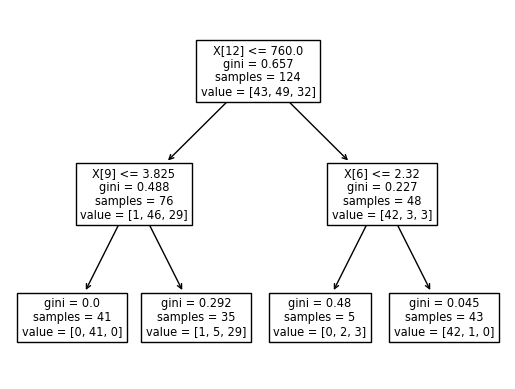

In [54]:
plot_tree(clf)

**From the tree above:** the first split of the data is done on feature 12, with threshold value 760.0.

### Problem 4.2 (5 points):

You will now vary the maximum depth allowed in your decision tree and see what effect this has on the error rate.

- Train a decision tree for every value of `max_depth` in `[1, 2, ..., 15]`. Use the default settings (other than `max_depth`). 
- Plot the resulting training and testing set accuracies as a function of depth. Be sure to include an x-label, a y-label, and a legend in your plot.
- Describe what you see happen as you increase the depth.

In [60]:
training_accuracies = []
testing_accuracies = []

for max_depth_value in range(1, 16):
    clf = DecisionTreeClassifier(random_state=seed, max_depth=max_depth_value)
    clf.fit(X_tr, y_tr)
    training_accuracies.append(clf.score(X_tr, y_tr))
    testing_accuracies.append(clf.score(X_te, y_te))

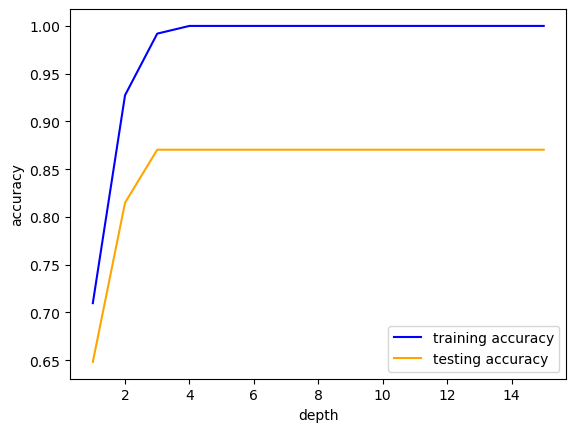

In [62]:
fig, axes = plt.subplots()
axes.set_xlabel('depth')
axes.set_ylabel('accuracy')

axes.plot(list(range(1, 16)), training_accuracies, color='blue', 
          label='training accuracy')
axes.plot(list(range(1, 16)), testing_accuracies, color='orange', 
          label='testing accuracy')

axes.legend()

**Observation:** The accuracy of both the training dataset and the testing dataset increase significantly as depth increase in the beginning, but as the depth keeps increasing, eventually the accuracy stays the same.

### Problem 4.3 (5 points):

Lastly, you will vary the minimum number of datapoints allowed in a leaf node in your decision tree and see what effect this has on the error rate.

- Train a decision tree for every value of `min_leaf_samples` in `[1, 2, ..., 15]`. Use `max_depth=3` and use the default settings for all other parameters.
- Plot the resulting training and testing set accuracies as a function of depth. Be sure to include an x-label, a y-label, and a legend in your plot.
- You should see that the training error increases as we increase the minimum number of leaf samples. Give an explanation for why this might happen.

In [63]:
training_accuracies = []
testing_accuracies = []

for min_samples_leaf_value in range(1, 16):
    clf = DecisionTreeClassifier(random_state=seed, max_depth=3, 
                                 min_samples_leaf=min_samples_leaf_value)
    clf.fit(X_tr, y_tr)
    training_accuracies.append(clf.score(X_tr, y_tr))
    testing_accuracies.append(clf.score(X_te, y_te))

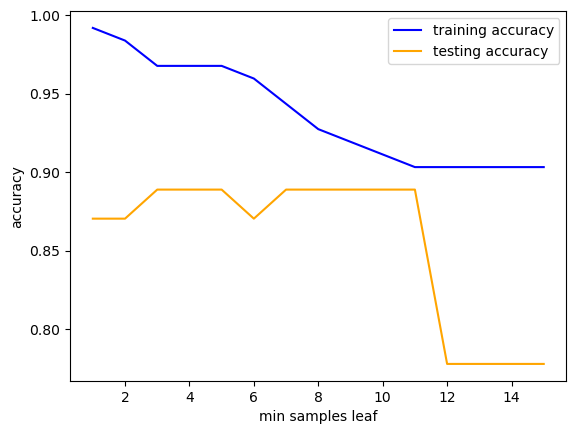

In [64]:
fig, axes = plt.subplots()
axes.set_xlabel('min samples leaf')
axes.set_ylabel('accuracy')

axes.plot(list(range(1, 16)), training_accuracies, color='blue', 
          label='training accuracy')
axes.plot(list(range(1, 16)), testing_accuracies, color='orange', 
          label='testing accuracy')

axes.legend()

**Explanation:** The training error increases as we increase the minimum number of leaf samples because there is too much generalization. When the minimum number of sample required to be in the leaf is large, it may force datapoints which have different class labels to be in the same leaf node. This result in a decrease in training accuracy.

---
### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed. If you did not collaborate with anyone, you should write something like "I completed this assignment without any collaboration."

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration.

I did not collaborate with anyone in this assignment.